In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = '/opt/ml/detection/dataset'
cat = ['General trash', 'Paper', 'Paper pack', 'Metal', 'Glass', 'Plastic', 'Styrofoam', 'Plastic bag', 'Battery', 'Clothing']


In [3]:
with open(path + '/stratified_kfold/basic_v2/cv_train_3.json', 'r') as j:
    train_json = json.load(j)
    
with open(path + '/train.json', 'r') as j:
    train_json = json.load(j)

In [5]:
#### s_img_ids= []
s_img_ids = []
s_new_annotations = []

m_img_ids= []
m_new_annotations = []

l_img_ids= []
l_new_annotations = []


for anno in train_json['annotations']:
    if anno['area'] < 32**2:
        s_img_ids.append(anno['image_id'])
        s_new_annotations.append(anno)
    elif 32**2 <= anno['area'] < 96**2:
        m_img_ids.append(anno['image_id'])
        m_new_annotations.append(anno)  
    else:
        l_img_ids.append(anno['image_id'])
        l_new_annotations.append(anno)   

s_img_ids = list(set(s_img_ids))
m_img_ids = list(set(m_img_ids))
l_img_ids = list(set(l_img_ids))

print(len(s_new_annotations), len(s_img_ids))
print(len(m_new_annotations), len(m_img_ids))
print(len(l_new_annotations), len(l_img_ids))

313 230
5194 1492
17637 4874


In [6]:
labels = []
box_size = []

for anno in train_json['annotations']:
    labels.append(cat[anno['category_id']])
    if anno['area'] < 32**2:
        box_size.append('small')
    elif 32**2 <= anno['area'] < 96**2:
        box_size.append('medium')
    else:
        box_size.append('large')

In [7]:
df = pd.DataFrame({'label':labels, 'box_size':box_size})

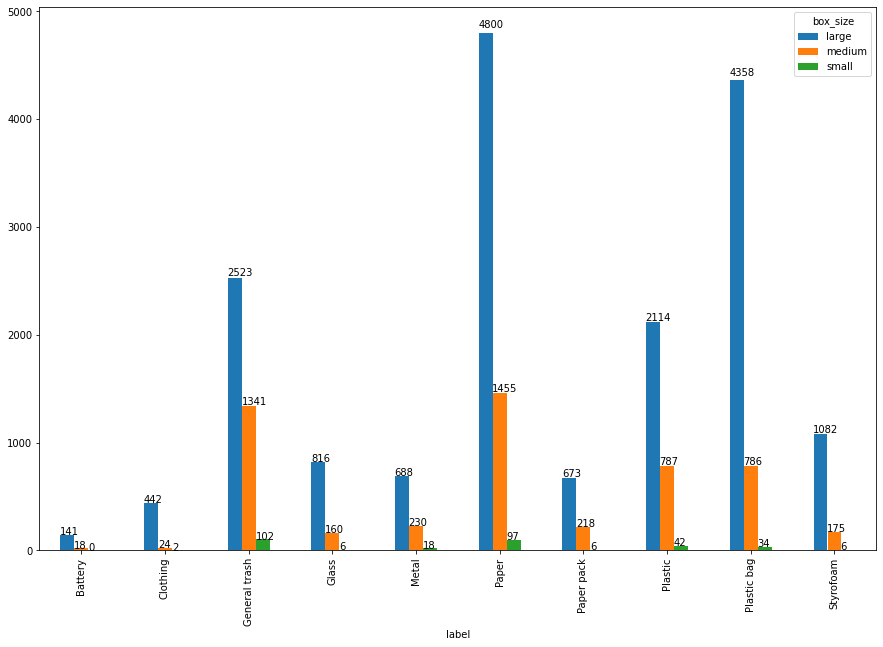

In [8]:
ax = df.groupby(['label','box_size']).size().unstack(fill_value=0).plot.bar(figsize=(15,10))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() *0.999, p.get_height() * 1.01))